# Imports

In [28]:
import ftplib
import pickle
import pandas as pd
import numpy as np
from mpl_toolkits.basemap import Basemap  # pip install basemap
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# with open("america.shp", "wb") as shapefile:
#     ftp = ftplib.FTP("ftp.cdc.gov")
#     ftp.login()
#     ftp.retrbinary("retr /pub/software/epi_info/epiinfo/shapefiles/namer/US.exe", shapefile.write)
#     ftp.close()

# Fake Data

In [8]:
with open("fake_htf_data.pickle", "wb") as pickle_file:

    lat = np.random.random(50) * (50 - 15) + 15
    lat = lat.repeat(50)
    long = np.random.random(50) * (-160 + 60) - 60
    long = long.repeat(50)

    index = pd.date_range("2000", "2050", freq="Y")
    index = np.tile(index, 50)

    value = np.array([np.linspace(0, np.random.random(), 50) for _ in range(50)]).flatten()

    dataframe = pd.DataFrame(index=index, columns=["lat", "long", "value"], data=zip(lat, long, value))
    print(dataframe)
    pickle.dump(dataframe, pickle_file)

                  lat        long     value
2000-12-31  15.467362  -90.379423  0.000000
2001-12-31  15.467362  -90.379423  0.009617
2002-12-31  15.467362  -90.379423  0.019233
2003-12-31  15.467362  -90.379423  0.028850
2004-12-31  15.467362  -90.379423  0.038467
...               ...         ...       ...
2045-12-31  49.350193 -105.934669  0.230033
2046-12-31  49.350193 -105.934669  0.235145
2047-12-31  49.350193 -105.934669  0.240257
2048-12-31  49.350193 -105.934669  0.245368
2049-12-31  49.350193 -105.934669  0.250480

[2500 rows x 3 columns]


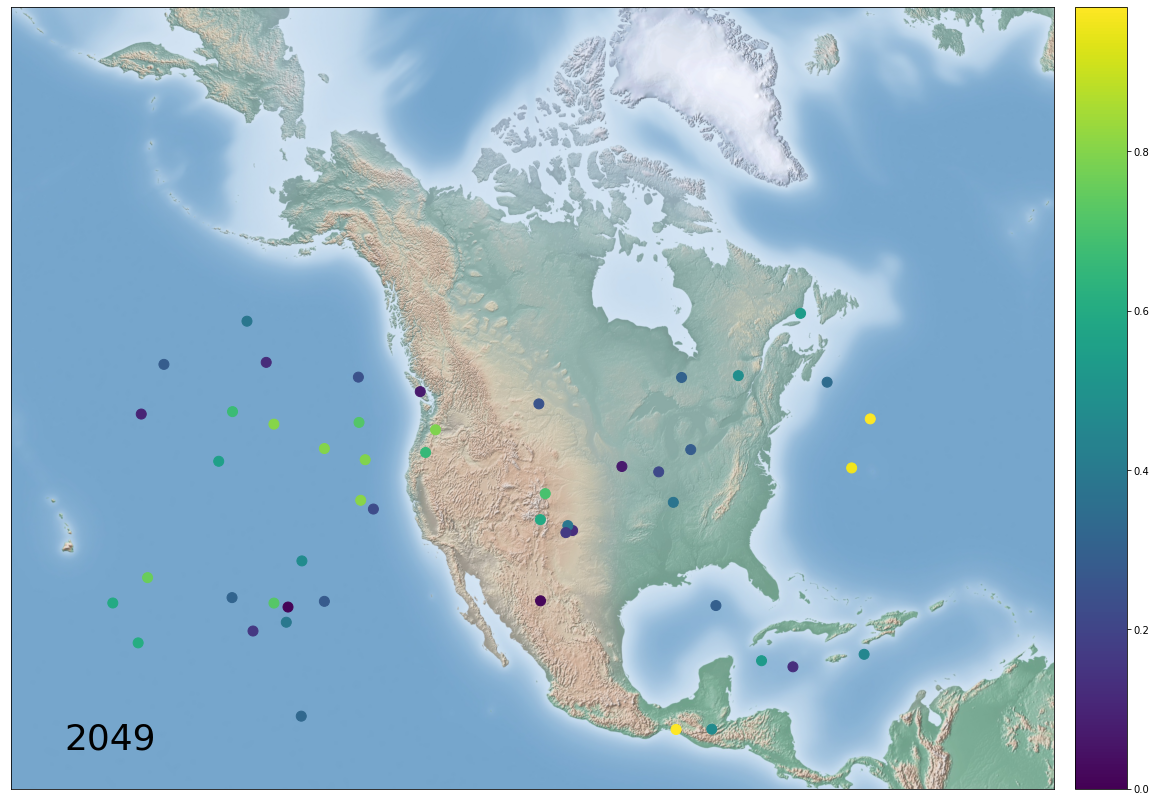

In [120]:
filename = "fake_htf_data.pickle"
dataframe = pd.read_pickle(filename)

def plot_map(htf_data):
    starting_year = str(htf_data.index[0].year)

    plt.figure(figsize=(20,20))
    m = Basemap(width=12000000, height=9000000, projection='lcc', lat_1=45, lat_2=55, lat_0=50, lon_0=-107)
    m.shadedrelief()

    x, y = m(htf_data.loc[starting_year]["long"], htf_data.loc[starting_year]["lat"])
    text_x, text_y = m(-146, 5)
    text = plt.text(text_x, text_y, starting_year, fontsize=36)
    scatter = m.scatter(x, y, c=htf_data.loc[starting_year]["value"], s=100, vmin=0, vmax=np.max(htf_data["value"]))
    m.colorbar(scatter)

    def update(frame):
        current_year = str(int(starting_year) + frame)
        text.set_text(current_year)
        scatter.set_array(htf_data.loc[current_year]["value"])
        return scatter,

    anim = animation.FuncAnimation(plt.gcf(), update, 50, repeat=True, interval=500, blit=True)
    anim.save("htf_predictions.gif", writer=animation.PillowWriter(fps=2))

    plt.show()

plot_map(dataframe)